## Import the important libraries for project.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read the Dataset 

In [26]:
df = pd.read_csv("HousePricePrediction.xlsx - Sheet1.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


## Checking missing values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


## Data preprocessing for changing categorical value into binary format.
                    Here used OrdinalEncoder method for sklearn preprocessing library 


In [28]:
from sklearn.preprocessing import OrdinalEncoder
df['MSZoning'] = df['MSZoning'].replace('C(all)', 'C')
encoder = OrdinalEncoder(categories='auto')
df[['MSZoning']] = encoder.fit_transform(df[['MSZoning']])
df[['LotConfig']] = encoder.fit_transform(df[['LotConfig']])
df[['BldgType']] = encoder.fit_transform(df[['BldgType']])
df[['Exterior1st']] = encoder.fit_transform(df[['Exterior1st']])
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.0
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.0
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.0
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.0
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.0


## Checking the NULL values in dataset.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   float64
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   float64
 5   BldgType      2919 non-null   float64
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   float64
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 296.6 KB


## Filling the NULL values in MSZoning.

In [30]:
# Here, First finding the mode of MSZoning values.
# After got the mode value of mszoning, To replace the NULL value into mode value.
a = df["MSZoning"].mode()                               # finding the mode value
df['MSZoning'] = df['MSZoning'].replace({np.nan:3.0}) # Just replaced the NULL value into mode value
(df['MSZoning'].isnull()).value_counts()      # After completion of filling of NULL value result here.

MSZoning
False    2919
Name: count, dtype: int64

## Filling the NULL values in Exterior1st.

In [31]:
mode_value = df["Exterior1st"].mode()
df['Exterior1st'] = df['Exterior1st'].replace({np.nan:12.0})
(df['Exterior1st'].isnull()).value_counts()

Exterior1st
False    2919
Name: count, dtype: int64

## Filling the NULL values in BsmtFinSF2.

In [32]:
mode_value2 = df["BsmtFinSF2"].mean()
df['BsmtFinSF2'] = df['BsmtFinSF2'].replace({np.nan:49.58224811514736})
(df['BsmtFinSF2'].isnull()).value_counts()

BsmtFinSF2
False    2919
Name: count, dtype: int64

## Filling the NULL values in TotalBsmtSF.

In [33]:
mode_value3 = df["TotalBsmtSF"].mean()
df['TotalBsmtSF'] = df['TotalBsmtSF'].replace({np.nan:1051.7775873886224})
(df['TotalBsmtSF'].isnull()).value_counts()
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.0
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.0
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.0
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.0
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,4.0,1936,4.0,3.0,7,1970,1970,5.0,0.0,546.0,NaN
2915,2915,160,4.0,1894,4.0,4.0,5,1970,1970,5.0,0.0,546.0,NaN
2916,2916,20,3.0,20000,4.0,0.0,7,1960,1996,12.0,0.0,1224.0,NaN
2917,2917,85,3.0,10441,4.0,0.0,5,1992,1992,6.0,0.0,912.0,NaN


## Completely filled the values in training features.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   float64
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   float64
 5   BldgType      2919 non-null   float64
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   float64
 10  BsmtFinSF2    2919 non-null   float64
 11  TotalBsmtSF   2919 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 296.6 KB


## Here, Target feature have huge NULL values.
        To solve using Machine learning algorithm is linear regression. 
        

In [35]:
df_missing = df[df['SalePrice'].isnull()]
df_not_missing = df.dropna()

In [36]:
# Split the dataset into features and target variable
X_train = df_not_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
y_train = df_not_missing['SalePrice']

In [37]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicted the NULL values in Target feature.

In [38]:
# Predict missing values
X_missing = df_missing[['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'Exterior1st']]
predicted_values = model.predict(X_missing)
df.loc[df['SalePrice'].isnull(), 'SalePrice'] = predicted_values
print(df)

        Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0        0          60       3.0     8450        4.0       0.0            5   
1        1          20       3.0     9600        2.0       0.0            8   
2        2          60       3.0    11250        4.0       0.0            5   
3        3          70       3.0     9550        0.0       0.0            5   
4        4          60       3.0    14260        2.0       0.0            5   
...    ...         ...       ...      ...        ...       ...          ...   
2914  2914         160       4.0     1936        4.0       3.0            7   
2915  2915         160       4.0     1894        4.0       4.0            5   
2916  2916          20       3.0    20000        4.0       0.0            7   
2917  2917          85       3.0    10441        4.0       0.0            5   
2918  2918          60       3.0     9627        4.0       0.0            5   

      YearBuilt  YearRemodAdd  Exterior1st  BsmtFin

In [39]:
new_df = df

In [40]:
new_df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3.0,8450,4.0,0.0,5,2003,2003,12.0,0.0,856.0,208500.000000
1,1,20,3.0,9600,2.0,0.0,8,1976,1976,8.0,0.0,1262.0,181500.000000
2,2,60,3.0,11250,4.0,0.0,5,2001,2002,12.0,0.0,920.0,223500.000000
3,3,70,3.0,9550,0.0,0.0,5,1915,1970,13.0,0.0,756.0,140000.000000
4,4,60,3.0,14260,2.0,0.0,5,2000,2000,12.0,0.0,1145.0,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,4.0,1936,4.0,3.0,7,1970,1970,5.0,0.0,546.0,142700.577433
2915,2915,160,4.0,1894,4.0,4.0,5,1970,1970,5.0,0.0,546.0,142700.577433
2916,2916,20,3.0,20000,4.0,0.0,7,1960,1996,12.0,0.0,1224.0,190768.577460
2917,2917,85,3.0,10441,4.0,0.0,5,1992,1992,6.0,0.0,912.0,203738.713226


## Spliting the dataset.

In [41]:
X = df[['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF']]
y = df['SalePrice']

## Feature selecting using Correlation analysis.

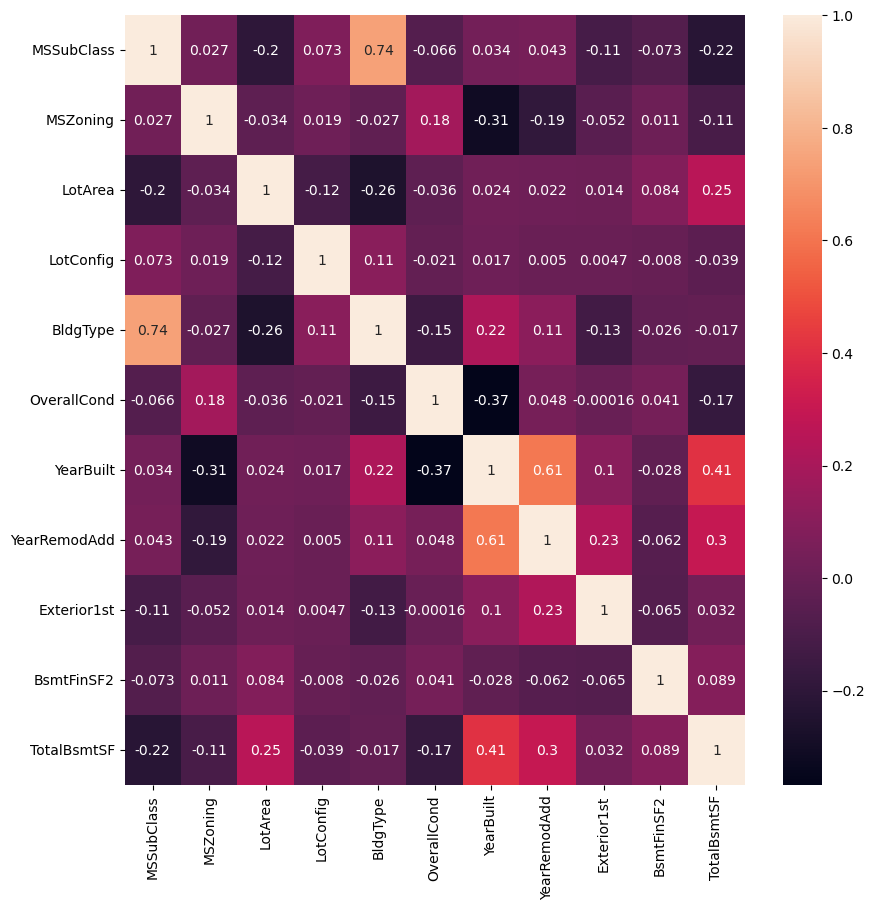

In [42]:
import seaborn as sns
plt.figure(figsize=(10,10))
cor = X.corr(method='pearson')
sns.heatmap(cor,annot=True)
plt.show()

## The selected features.

In [43]:
def correlation(data , threshold):
    corr_rel = set()
    C = data.corr()
    for i in range(len(C.columns)):
        for j in range(i):
            if abs(C.iloc[i,j]>threshold):
                col_name=C.columns[i]
                corr_rel.add(col_name)
    return corr_rel

feature = correlation(X , 0.2)
len(set(feature))
print(feature)

{'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BldgType'}


## Spliting the selected feature for training and testing.

In [44]:
X = df[['Exterior1st', 'TotalBsmtSF', 'BldgType', 'YearBuilt', 'YearRemodAdd']]
y = df['SalePrice']
X_train , x_test , Y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

## Build the machine learning model.

In [45]:
lr = LinearRegression()
model= lr.fit(X_train , Y_train)

## Predicted values.

In [46]:
model.predict(x_test)

array([147062.55792095, 187760.98591953, 173570.69279952, 198011.46679009,
       222751.32546033, 264422.16886712, 100703.23352704, 195092.71982445,
        88193.1058598 , 205004.97580196, 171973.94913445, 192492.28106369,
       150478.8425382 , 233090.68583852, 178418.28069712, 219277.58816044,
       146287.2710475 , 206330.55978359,  93233.06969096, 137315.04419101,
       219634.95641104,  93349.0044016 , 103309.76543322, 217246.54796008,
       201745.40234708, 216141.14641311, 216079.06767999, 124756.72274731,
       210611.47814996, 138673.2897641 , 259828.52987844, 157456.90778018,
       189230.25502487, 203276.81823814, 213405.22481815, 245285.37391725,
       166491.49046376, 151415.88269052, 141241.15856035, 142593.13062012,
        93102.73896307, 208297.79640669, 258379.61997932, 166168.8592351 ,
       173054.22474073, 201593.17724936, 214828.17938569, 182598.58713247,
       178085.31416303, 195203.59553708, 112116.47666462, 189494.5221236 ,
       107379.51421777, 2